importando bibliotecas

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from scipy import optimize as op

# primeira coleção de ativos

In [163]:
#taxa livre de risco
rf=0.0037
#numero de simulações da carteira
num_sim=10000000
#base de dados com os retornos de cada ação
carteira=pd.read_excel(r'C:\Users\rique\OneDrive - Insper - Institudo de Ensino e Pesquisa\IQFC\Pasta1_.xlsx')
#data como índice da tabela
carteira.set_index(['Data'],inplace=True)
#salvando os tickers em uma lista
tickers=list(carteira.columns)
#savando a contagem do número de ações em uma variável
num_acoes=len(tickers)
#tabela que contém a primeira coleção de ativos
carteira

,Retorno IBOVESPA,JBSS3 - JBS,MTZ - MasTec,RIO - Rio Tinto,VIXM - Volatility Index,BTG Pactual Tesouro IPCA,ABEV3 - Ambev,BRFS3 - BRF,ELET3 - Eletrobrás,LPSB3 - Lopes Royal,WY - Weyerhauser,HGLG11 - CSHG LOGÍSTICA FDO INV IMOB - FII,DIS -Disney,TIP - iShares TIPS Bonds ETF
Data,,,,,,,,,,,,,,
Fev-2012,0.043427,0.142410,0.079804,-0.043655,0.002092,0.017614,0.117692,0.037572,0.040669,0.084888,0.050846,0.058813,0.079434,-0.005781
Mar-2012,-0.019769,0.027397,0.028425,-0.023538,-0.154018,0.018123,0.098186,0.002786,-0.082441,0.061909,0.049306,-0.040468,0.042629,-0.008595
Abr-2012,-0.041699,0.000000,-0.038695,0.008635,-0.018421,0.041829,0.071143,-0.031944,-0.049008,-0.112011,-0.071168,-0.003907,-0.015304,0.017845
Mai-2012,-0.118570,-0.273333,-0.059804,-0.229178,0.109439,0.022064,-0.071503,-0.099283,-0.113414,0.138075,-0.014664,-0.072917,0.060311,0.019464
Jun-2012,-0.002496,0.106422,-0.080122,0.106201,-0.108594,-0.004992,0.015305,-0.028187,0.073851,-0.089674,0.123054,0.007262,0.061037,-0.006686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ago-2021,-0.024793,0.004232,-0.096710,-0.069607,-0.035973,-0.011043,0.027644,-0.085870,-0.065093,0.009456,0.067299,-0.034234,0.029997,-0.001641
Set-2021,-0.065683,0.189285,-0.056430,-0.109897,0.057610,-0.001658,-0.105263,0.156704,0.023386,-0.362998,-0.007298,-0.035199,-0.066906,-0.007800
Out-2021,-0.067386,0.053412,0.033032,-0.053128,-0.058805,-0.025613,0.110458,-0.142488,-0.121527,-0.102941,0.018453,-0.017849,-0.000591,0.011096


# calculadando o retorno esperado da carteira

In [164]:
retorno_mensal_esperado=carteira.mean()
retorno_mensal_esperado

Retorno IBOVESPA                              0.006443
JBSS3 - JBS                                   0.023053
MTZ - MasTec                                  0.020067
RIO - Rio Tinto                               0.009163
VIXM - Volatility Index                      -0.014052
BTG Pactual Tesouro IPCA                      0.008871
ABEV3 - Ambev                                 0.008301
BRFS3 - BRF                                   0.003434
ELET3 - Eletrobrás                            0.021774
LPSB3 - Lopes Royal                          -0.003005
WY - Weyerhauser                              0.012366
HGLG11 - CSHG LOGÍSTICA FDO INV IMOB - FII    0.004833
DIS -Disney                                   0.014857
TIP - iShares TIPS Bonds ETF                  0.002319
dtype: float64

# calculando a matriz de covariãncia

In [165]:
cov_carteira=carteira.cov()
cov_carteira

,Retorno IBOVESPA,JBSS3 - JBS,MTZ - MasTec,RIO - Rio Tinto,VIXM - Volatility Index,BTG Pactual Tesouro IPCA,ABEV3 - Ambev,BRFS3 - BRF,ELET3 - Eletrobrás,LPSB3 - Lopes Royal,WY - Weyerhauser,HGLG11 - CSHG LOGÍSTICA FDO INV IMOB - FII,DIS -Disney,TIP - iShares TIPS Bonds ETF
Retorno IBOVESPA,0.004216,0.002000,0.002277,0.002594,-0.003009,0.000865,0.001989,0.003651,0.006471,0.004876,0.002510,0.003450,0.001635,0.000196
JBSS3 - JBS,0.002000,0.012784,0.002155,0.000737,-0.001961,0.000179,0.001520,0.005040,0.005395,0.000750,0.002048,0.000734,0.001785,0.000064
MTZ - MasTec,0.002277,0.002155,0.010880,0.002152,-0.003426,0.000299,0.001551,0.002412,0.003197,0.003795,0.003767,0.001695,0.002663,-0.000095
RIO - Rio Tinto,0.002594,0.000737,0.002152,0.006280,-0.001830,0.000406,0.001272,0.001321,0.002577,0.000157,0.001850,0.002675,0.001897,0.000085
VIXM - Volatility Index,-0.003009,-0.001961,-0.003426,-0.001830,0.009100,-0.000577,-0.002715,-0.004007,-0.001901,-0.003321,-0.004501,-0.002437,-0.003262,-0.000162
BTG Pactual Tesouro IPCA,0.000865,0.000179,0.000299,0.000406,-0.000577,0.000494,0.000438,0.000482,0.001426,0.001287,0.000579,0.000999,0.000275,0.000111
ABEV3 - Ambev,0.001989,0.001520,0.001551,0.001272,-0.002715,0.000438,0.004397,0.002811,0.001720,0.003412,0.001503,0.001842,0.001376,0.000089
BRFS3 - BRF,0.003651,0.005040,0.002412,0.001321,-0.004007,0.000482,0.002811,0.012639,0.005120,0.004673,0.002669,0.001931,0.002773,0.000095
ELET3 - Eletrobrás,0.006471,0.005395,0.003197,0.002577,-0.001901,0.001426,0.001720,0.005120,0.027738,0.009956,0.002601,0.005928,0.000920,0.000209
LPSB3 - Lopes Royal,0.004876,0.000750,0.003795,0.000157,-0.003321,0.001287,0.003412,0.004673,0.009956,0.025311,0.001345,0.004885,0.001341,0.000334


# criando listas para salvar os pesos, o retorno , o desvio padão e o índice de sharpe da simulação das carteiras e simulando carteiras

In [166]:
peso_acoes=[]
retorno_cart=[]
desvio_cart=[]
sharpe_index=[]
for carteiras in range(num_sim):
    #criando um vetor randõmicos de números, com 15 posições
    a=-1
    b=1
    peso=(b-a)*np.random.random(num_acoes)+a
    #determinando o peso representativo de cada ativo, para isso divimos cada peso pela soma do vetor pela soma de todos
    peso=peso/np.sum(peso)
    #calculando o retorno da carteira multiplicando o peso dos ativos pelo retorno de cada um
    retorno=np.dot(peso,retorno_mensal_esperado)
    #desvio padrão da carteira: multiplicando a matriz de pesos pela matriz de covariância e em sequência multiplica-se o resultado pela matiz transposta do peso
    desvio=np.sqrt(np.matmul(peso.T,np.matmul(peso,np.array(cov_carteira))))
    #calculando o índice de sharpe para a carteira, já considerando o ativo livre de risco rf
    sharpe=(retorno-rf)/desvio
    #salvando as informações nas listas criadas anteriormente
    peso_acoes.append(peso)
    retorno_cart.append(retorno)
    desvio_cart.append(desvio)
    sharpe_index.append(sharpe)

# criando um data frame com as informações de cada carteira aleatória gerada anteriormente;peso, retorno, desvio e o sharpe

In [167]:
dicionario={'Retorno':retorno_cart,'Desvio Padrão': desvio_cart,'Sharpe': sharpe_index}

In [168]:
for counter,ticker in enumerate(tickers):
    dicionario[ticker + ' peso'] = [peso[counter] for peso in peso_acoes]
    carteira2 = pd.DataFrame(dicionario)

carteira2

,Retorno,Desvio Padrão,Sharpe,Retorno IBOVESPA peso,JBSS3 - JBS peso,MTZ - MasTec peso,RIO - Rio Tinto peso,VIXM - Volatility Index peso,BTG Pactual Tesouro IPCA peso,ABEV3 - Ambev peso,BRFS3 - BRF peso,ELET3 - Eletrobrás peso,LPSB3 - Lopes Royal peso,WY - Weyerhauser peso,HGLG11 - CSHG LOGÍSTICA FDO INV IMOB - FII peso,DIS -Disney peso,TIP - iShares TIPS Bonds ETF peso
0,0.017485,0.107872,0.127786,-0.668977,0.135843,0.513424,-0.527582,0.175861,0.388178,0.512677,-0.090566,-0.023168,-0.195873,0.440085,-0.566487,0.270060,0.636525
1,0.026397,0.257430,0.088168,-1.054978,1.140974,0.289984,-0.145670,-0.425510,1.475459,0.656731,0.527357,-1.021410,-0.528782,0.488207,-0.293693,-0.609229,0.500558
2,0.039526,0.557265,0.064289,3.007469,1.458040,1.640475,-2.837259,-1.385246,-1.254144,2.319305,1.773559,-2.081356,-2.019953,-1.550460,1.124207,-0.234612,1.039975
3,-0.017543,0.318393,-0.066720,1.208374,0.406330,-0.518924,0.496179,-0.458824,-1.033761,1.074169,-0.453095,-0.399733,1.403754,-1.510575,1.354751,-0.565559,-0.003085
4,0.007113,0.069264,0.049279,0.509417,-0.035531,-0.056014,-0.195018,0.099135,0.399854,0.651920,-0.091377,-0.271829,-0.172570,-0.112459,0.177213,0.480036,-0.382779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,-0.015430,0.097974,-0.195261,0.563332,-0.399626,-0.145918,0.409135,0.401162,-0.315694,0.478850,0.333883,-0.120341,-0.240690,-0.560070,0.405719,-0.074237,0.264497
9999996,-0.000350,0.081175,-0.049898,0.188525,-0.224769,0.150845,0.346023,0.176827,-0.375378,0.086113,-0.028058,-0.162051,0.274867,0.233068,0.284882,0.207136,-0.158028
9999997,-0.002870,0.065123,-0.100880,0.284818,-0.321703,-0.145776,0.170876,0.337132,0.242295,-0.058605,0.077667,0.137218,0.245549,0.134777,-0.277198,0.311090,-0.138142
9999998,0.033637,0.337352,0.088742,0.727813,-0.004894,-0.034343,0.971313,-0.501460,-0.589109,0.291945,0.053108,1.195212,1.091909,0.771177,-1.468442,-0.420394,-1.083835


# plotando o sharpe de todas as carteiras simuladas em gráfico de retorno por desvio padrão

<AxesSubplot:xlabel='Desvio Padrão', ylabel='Retorno'>

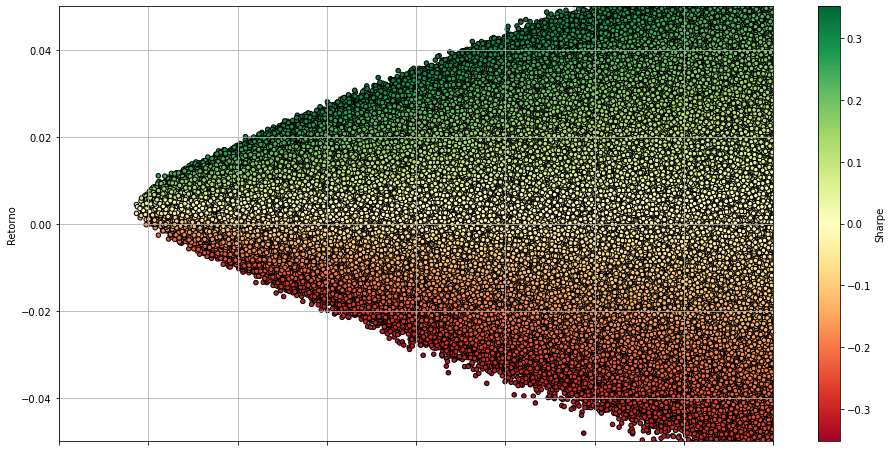

In [169]:
carteira2.plot.scatter(x='Desvio Padrão', y='Retorno', c='Sharpe', figsize=(16,8), grid = True, cmap='RdYlGn', edgecolors= 'black', xlim=(0,0.2), ylim=(-0.05,0.05))

# localizando a carteira com maior sharpe

In [170]:
maior_sharpe= carteira2['Sharpe'].max()
carteira_maior_sharpe=carteira2.loc[carteira2['Sharpe']==maior_sharpe]
#aqui pegamos a matriz transposta para ter uma melhor vizualização dos dados
print(f'carteira com maior sharpe: {carteira_maior_sharpe.T}')

carteira com maior sharpe:                                                   7461374
Retorno                                          0.085082
Desvio Padrão                                    0.231212
Sharpe                                           0.351978
Retorno IBOVESPA peso                           -2.049028
JBSS3 - JBS peso                                 0.628321
MTZ - MasTec peso                                0.682649
RIO - Rio Tinto peso                             0.100344
VIXM - Volatility Index peso                    -1.160798
BTG Pactual Tesouro IPCA peso                    2.064063
ABEV3 - Ambev peso                               0.695311
BRFS3 - BRF peso                                -0.608972
ELET3 - Eletrobrás peso                          1.046030
LPSB3 - Lopes Royal peso                        -0.885022
WY - Weyerhauser peso                           -0.409832
HGLG11 - CSHG LOGÍSTICA FDO INV IMOB - FII peso  0.333074
DIS -Disney peso                             

# criando a função de otimização, de soma dos pesos e encontrando a carteira otima a partir da biblioteca optimize 

In [171]:
def otimizacao(peso, retorno_mesnsal_esperado, cov_carteira, rf):
    #primeiro calculamos o retorno da carteira multiplicando a matriz do peso pela matriz dos retornos esperados
    retorno= np.dot(peso, retorno_mensal_esperado)
    #segundo passo é calcular o desvio padrão da carteira, para isso multiplicamos a patriz de pesos pela matriz de covariãncias e multiplicamos esse resultado pela matriz transposta do peso
    desvio=np.sqrt(np.matmul(peso.T, np.matmul(peso,np.array(cov_carteira))))
    #por fim calculamos o sharpe já considerando o ativo livre de riscos rf
    sharpe=-(retorno-rf)/desvio
    
    return sharpe

def soma_pesos(peso):
    soma=1
    soma=soma - np.sum(peso)
    return soma

restricao= {'type': 'eq', 'fun': soma_pesos}
start= np.random.random(num_acoes)
args= (retorno_mensal_esperado, cov_carteira, rf)
result= op.minimize(otimizacao, start, args=args, constraints=restricao)
pesos= result.x
carteiraOtima= pd.DataFrame({'Ativos': tickers, 'Pesos': pesos})
carteiraOtima.set_index(['Ativos'],inplace=True)
carteiraOtima

,Pesos
Ativos,
Retorno IBOVESPA,-422.914407
JBSS3 - JBS,116.646642
MTZ - MasTec,63.361481
RIO - Rio Tinto,66.611003
VIXM - Volatility Index,-185.418941
BTG Pactual Tesouro IPCA,1691.839263
ABEV3 - Ambev,8.517074
BRFS3 - BRF,-75.045161
ELET3 - Eletrobrás,77.556517


In [172]:
#calculando o retorno da carteira multiplicando a matriz peso pela matriz dos retornos esperados
retorno_p= np.dot(pesos, retorno_mensal_esperado)
#calculando o desvio padrão da carteira multiplicando a matriz de pesos pela matriz de covariância e multiplicando esse resultado pela matriz transposta do peso
desvio_p= np.sqrt(np.matmul(pesos.T, np.matmul(pesos, np.array(cov_carteira))))
#calculando o índice de sharpe
sharpe_p= (retorno_p-rf)/desvio_p
pd.DataFrame([retorno_p, desvio_p, sharpe_p], ['E[r]', 'Risco','Sharpe'], ['carteira de ativos de risco otima'])

,carteira de ativos de risco otima
E[r],18.899403
Risco,37.927353
Sharpe,0.498208


# Construindo a lac

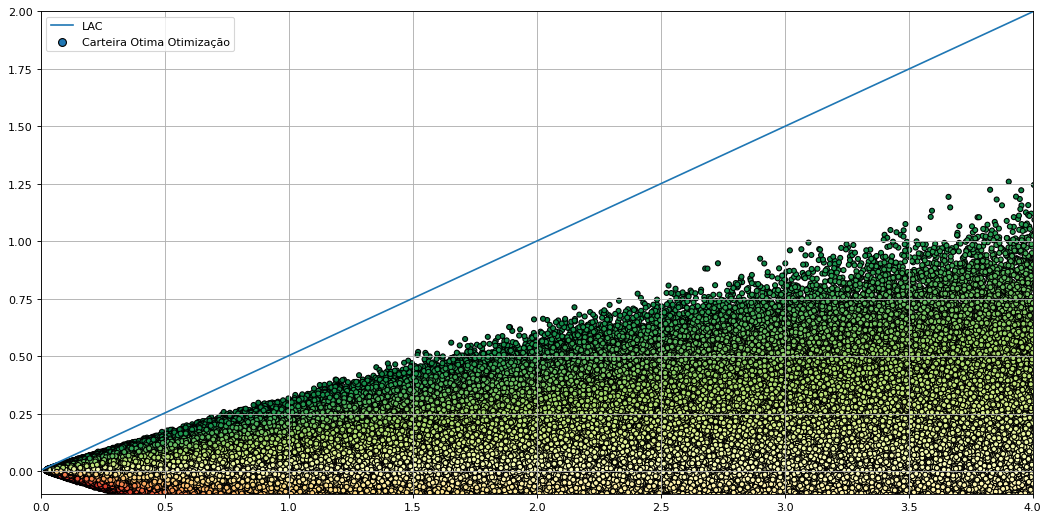

In [180]:
fim= max(carteira2['Desvio Padrão'])
x= np.linspace(0,fim,num_sim)
lac= sharpe_p*x + rf
plt.figure(num="Grafico de retorno por desvio padrão", figsize = (16,8), dpi=80)
plt.scatter(x=carteira2['Desvio Padrão'], y=carteira2['Retorno'], c=carteira2['Sharpe'], s=20, cmap='RdYlGn', edgecolors='black' )   
plt.scatter(x=desvio_p, y=retorno_p, s=50,edgecolors='black', label='Carteira Otima Otimização')
plt.plot(x,lac,label='LAC')
plt.ylim((-0.1,2))
plt.xlim((0,4))
plt.grid()
plt.legend()


# criando a função utilidade e plotando o gráfico de cada perfil de investidor junto com a LAC

In [174]:
def retorno_utilidade_investidor(A, U):
    sigma= np.linspace(0,max(carteira2['Desvio Padrão']), num_sim)
    retorno= 0.5*A*sigma**2 + U
    return retorno

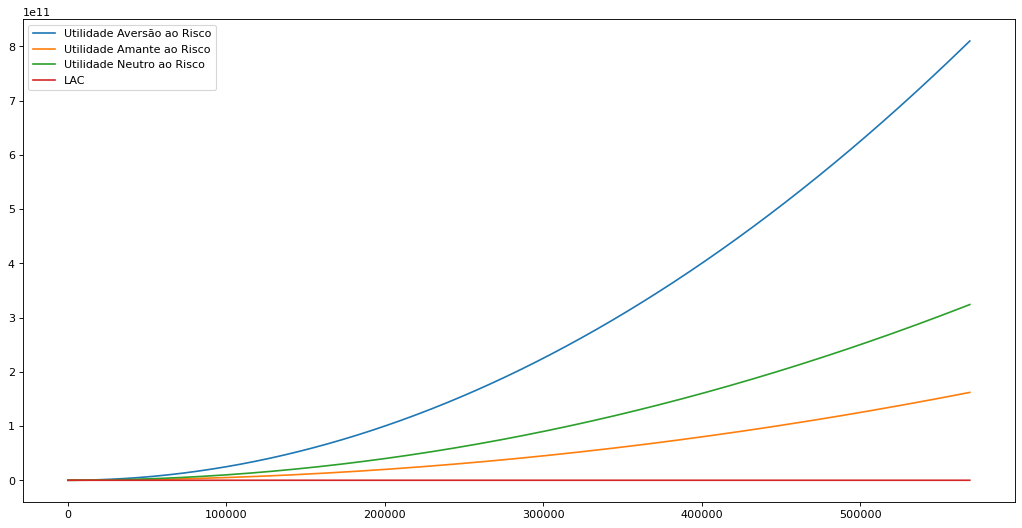

In [175]:
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
U=0.05
plt.plot(x, retorno_utilidade_investidor(5,U), label='Utilidade Aversão ao Risco')
plt.plot(x, retorno_utilidade_investidor(1,U), label='Utilidade Amante ao Risco')
plt.plot(x, retorno_utilidade_investidor(2,U), label='Utilidade Neutro ao Risco')
plt.plot(x,lac,label='LAC')
plt.legend()

# criando a função para encontrar o retorno, desvio e utilidade de cada investidor, e em seguida plotando o gráfico de cada um

In [176]:
def CPO(A):
    y= (retorno_p-rf)/(A*desvio_p**2)
    retorno_c=y*retorno_p + (1-y)*rf
    desvio_c = ((y**2)*desvio_p**2)**(1/2)
    return retorno_c, desvio_c

def utilidade_investidor(A, retorno_c, desvio_c):
    utilidade_c= retorno_c - 0.5*A*desvio_c**2
    return utilidade_c

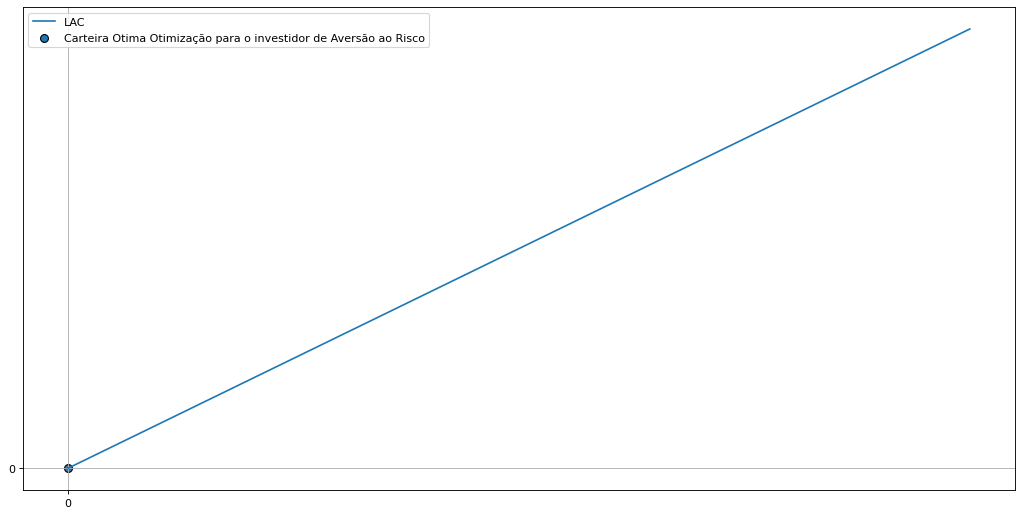

In [177]:
A=20
retorno_c, desvio_c= CPO(A)
utilidade_c= utilidade_investidor( A, retorno_c, desvio_c)
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
plt.plot(x,lac, label='LAC')
plt.scatter(x=desvio_c, y=retorno_c, s=50, edgecolors='black', label= 'Carteira Otima Otimização para o investidor de Aversão ao Risco')
plt.yticks([retorno_c])
plt.xticks([desvio_c])
plt.grid()

plt.legend()

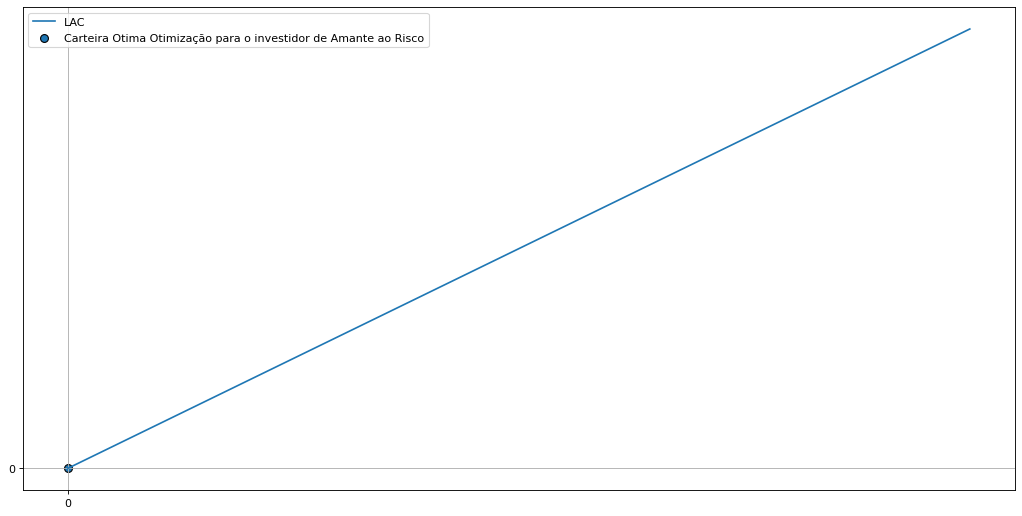

In [178]:
A=1
retorno_c, desvio_c= CPO(A)
utilidade_c= utilidade_investidor( A, retorno_c, desvio_c)
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
plt.plot(x,lac, label='LAC')
plt.scatter(x=desvio_c, y=retorno_c, s=50, edgecolors='black', label= 'Carteira Otima Otimização para o investidor de Amante ao Risco')
plt.yticks([retorno_c])
plt.xticks([desvio_c])
plt.grid()

plt.legend()

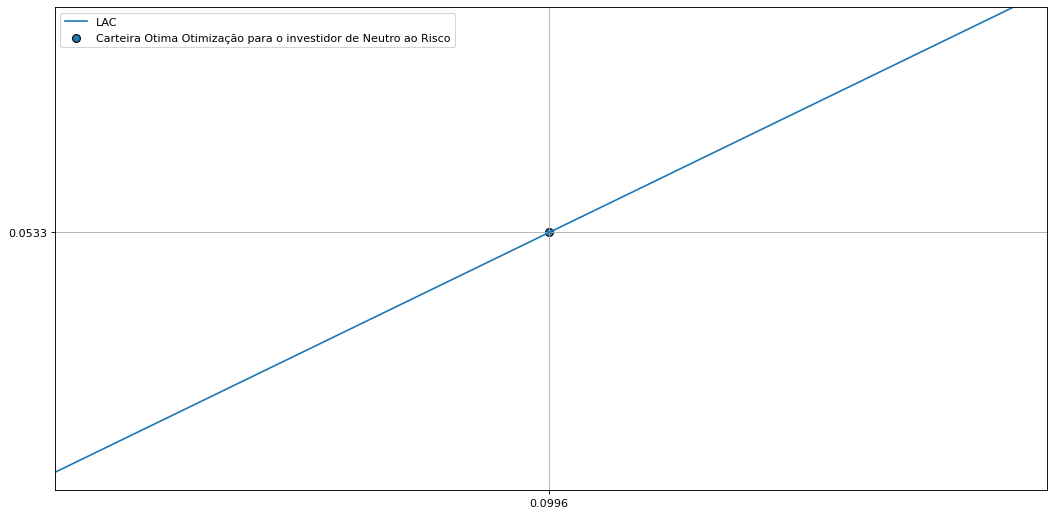

In [179]:
A=5
retorno_c, desvio_c= CPO(A)
utilidade_c= utilidade_investidor( A, retorno_c, desvio_c)
plt.figure(num='Gráfico de retorno por desvio padrão', figsize=(16,8), dpi=80)
plt.plot(x,lac, label='LAC')
plt.scatter(x=desvio_c, y=retorno_c, s=50, edgecolors='black', label= 'Carteira Otima Otimização para o investidor de Neutro ao Risco')
plt.yticks([retorno_c])
plt.xticks([desvio_c])
plt.grid()
plt.ylim((0,0.1))
plt.xlim((0,0.2))
plt.legend()